## Simulation und Modellierung WS 16/17 Uebung 07 : 
### Abgabe zum 11.12.2016

### <u>Aufgabe 1</u> Erste Schritte mit Git (3P)

Ziel dieser Aufgabe ist, die Lösung dieses kompletten Aufgabenblattes bei einem Git-Filehost (github) online zu stellen. An der hochgeladenen Version sollen Sie dann noch mindestens eine Änderung vornehmen.

Nun der Reihenfolge nach: 
* Erstellen Sie einen Account bei Github mit einem `username`

  https://github.com/
 
  Erstellen Sie dort per Mausklick ein neues Repository, z.B. `my_repo`. (unter `new repository`)

* Installieren Sie git auf Ihrem Arbeitsrechner:

  #### Linux:
  
  `yum install git`
  
  `apt-get install git`
  
  `zypper in git`

  #### Mac:
  
  `brew install git`
  
  https://git-scm.com/download/mac
  
  #### Windows:
  
  http://git-for-windows.github.io//

  Setzen Sie dann eventuell Namen und Adresse.
  
  `git config --global user.name "Your Name"`
  
  `git config --global user.email you@example.com`


* Initialisieren Sie git in einem neuen Ordner. Fügen Sie `my_repo.git` als origin hinzu. Speichern Sie dieses notebook im neuen Ordner. Führen Sie `git add .`, `git commit -m "  "` und `git push origin master` aus. Das alles geht im Terminal folgendermaßen:

  ```bash
      mkdir neuer_ordner
      cd neuer_ordner
      git init
      git remote add origin https://username@bitbucket.org/username/my_repo.git
      cp /path/to/notebook/my_notebook.ipynb my_notebook.ipynb
      git add .
      git commit -m "Dieses notebook ist die Hausaufgabe Blatt 7, zunaechst unausgefuellt."
      git push origin master  
  ```
  
  Sehen Sie nach, ob Ihr notebook online ist.

* Spielen Sie mit `git status`, `git log`, `git branch -av` .. herum und klicken Sie im Webfilehost herum, bis Sie sich ein wenig auskennen. Schreiben Sie Fragen für die Übung auf.

* Nehmen Sie nun lokal auf Ihrem Rechner Änderungen am notebook vor, zum Beispiel indem Sie die Hausaufgaben lösen. Ändern Sie dies wie oben online: `git add .`, `git commit -m "  "`, `git push origin master`. Achten Sie auf sinnvolle commit-Kommentare.
  
  ```bash
      git add .
      git commit -m "Aufg. 1 geloest, es gibt noch ein Problem mit dem Vorzeichen von h."
      git push origin master  
  ```

Senden Sie den https-Repository-Pfad an frpeter (at) uni-potsdam.de.

### <u>Aufgabe 2</u> Das Lineare Least Squares Problem (7P)

Fuer die Koordinaten $(x,y)$ eines beliebiegen Kegelschnittes in der Ebene gilt

$$
        f(x,y) = A x^2 + B xy + C y^2 + D x + E y = 1
$$

Die Datei `orbit.dat` enthaelt eine Tabelle von $x$ und $y$ Werten, welche messfehlerbehaftete Punkte eines Kegelschnittes sind. 


- Laden Sie die Daten in ein `numpy` Array und finden Sie die Koeffizienten $A,B,C,D$ und $E$, welche die Summe der quadratischen Abweichungen ueber alle Messpunkte des Ausdrucks auf der linken Seite zur Zahl `1` minimiert.

Der Kegelschnitt ist eine geschlossene Kurve, wenn $B^2-4AC<0$ gilt, eine Parabel, wenn $B^2-4AC=0$ und ansonsten eine Hyperbel.

- Ist dieser Kegelschnitt eine offene oder geschlossene Kurve?
- Zeichnen Sie alle Kurven $y=y(x)$, die die Kegelschnittgleichung mit den von Ihnen gefundenen Koeffizienten erfuellen zusammen mit den Datenpunkten in ein Diagram.

*Hinweis* : Sie koennen die Kegelschnittgleichung als quadratische Gleichung explizit nach $y$ aufloesen und beide Loesungen dort plotten, wo der Imaginaerteil gleich Null (oder sehr klein) ist, oder den Wertebereich von $x$ explizit berechnen.

*Zur Erinnerung* : Die Summe der quadratischen Abweichungen eines ueberbestimmten linearen Gleichungssystems

$$
    \mathrm{A}(\vec{x},\vec{y}) \vec{c} = \vec{b}
$$
wird durch die Loesung des kleineren linearen Gleichungssystems

$$
    \mathrm{A}^\top\mathrm{A} \vec{c} = \mathrm{A}^\top\vec{b}
$$
minimiert.

Kegelschnitt ist geschlossene Kurve.


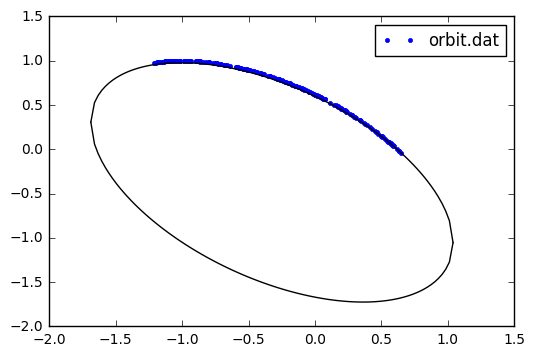

In [42]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# importiere Daten
x, y = np.loadtxt('orbit.dat', unpack=True)

# finde Koeffizienten a, b, c, d, e
# durch Loesen von A*(a, b, c, d, e) = (1, ..., 1)
A = np.array([x**2, x*y, y**2, x, y]).T
coef = np.linalg.solve(A.T.dot(A), A.T.dot(np.ones((len(x), 1))))
a = coef[0]
b = coef[1]
c = coef[2]
d = coef[3]
e = coef[4]

# finde Rand des Definitionsbereichs D(y \in R)
# durch Loesen der quadratischen Gl. fuer x
p = (b*e/(2*c**2) - d)/(b**2/(4*c**2) - a)
q = (e**2/(4*c**2) + 1)/(b**2/(4*c**2) - a)
x_def1 = -p/2 - np.sqrt(p**2/4 - q)
x_def2 = -p/2 + np.sqrt(p**2/4 - q)

# finde Definitionsbereich,
# x muss zwischen x_def1, x_def2 liegen
if (x_def1 < x_def2):
    gr_x = np.linspace(x_def1, x_def2, 100)
else:
    gr_x = np.linspace(x_def2, x_def1, 100)

# y(x) explizit im Def.bereich gr_x
gr_y1 = -(b*gr_x + e)/(2*c) + np.sqrt((b*gr_x + e)**2/(4*c**2) - a*gr_x**2 - d*gr_x + 1)
gr_y2 = -(b*gr_x + e)/(2*c) - np.sqrt((b*gr_x + e)**2/(4*c**2) - a*gr_x**2 - d*gr_x + 1)

# welche Form
if (b**2 - 4*a*c < 0):
    print('Kegelschnitt ist geschlossene Kurve.')
else:
    if (abs(b**2 - 4*a*c) < 1e-15):
        print('Kegelschnitt ist eine Parabel.')
    else:
        print('Kegelschnitt ist eine Hyperbel.')

# Plots
plt.plot(x, y, '.', label='orbit.dat')
plt.plot(gr_x, gr_y1, 'k')
plt.plot(gr_x, gr_y2, 'k')
plt.xlim([-2.0, 1.5])
plt.legend()
plt.show()

##### Nebenrechnungen:

- *y(x)* explizit:

$$
    A x^2 + B x y + C y^2 + D x + E y = 1 \\
    \Leftrightarrow ~ y^2 + \left( \frac{B x + E}{C} \right) y + (A x^2 + D x - 1) = 0 \\
    \Rightarrow ~ y_{1, 2}(x) = -\frac{B x + E}{2 C} \pm \sqrt{\frac{(B x + E)^2}{4 C^2} - A x^2 - D x + 1}
$$

- Definitionsbereich von reellen *y(x)*:

$$
    \frac{(B x + E)^2}{4 C^2} - A x^2 - D x + 1 \geq 0 \\
    \Leftrightarrow ~ x^2 + \frac{\frac{B E}{2 C^2} - D}{\frac{B^2}{4 C^2} - A} x + \frac{\frac{E^2}{4 C^2} + 1}{\frac{B^2}{4 C^2} - A} \geq 0 \\
    \Rightarrow ~ \{\max{x}, \min{x}\} = - \frac{1}{2} \frac{\frac{B E}{2 C^2} - D}{\frac{B^2}{4 C^2} - A} \pm \sqrt{\frac{1}{4} \left( \frac{\frac{B E}{2 C^2} - D}{\frac{B^2}{4 C^2} - A} \right)^2 - \frac{\frac{E^2}{4 C^2} + 1}{\frac{B^2}{4 C^2} - A}}
$$

### <u>Zusatzaufgabe</u> (2P)

- Schreiben Sie eine Funktion `polyfit(x,y,N=0)`, welche fuer `L` Datenpunkte in den Containern `x` und `y` die Koeffizienten `c` eines Polynoms 
$$
    y = p(x)= c_0 x^0 + c_1 x^1 + c_2 x^2 + \dots + c_N x^N
$$ 
`N`ten Grades findet, welches die Summe der quadratischen Abweichungen $\sum_l (p(x_l)-y_l)^2$ minimiert. *Hinweis* : wandeln Sie `x` und `y` in `numpy` arrays um.
- Demonstrieren Sie die Funktion grafisch anhand von `L` $\gg$ `N` Punkten eines Polynoms, welche zufaellige Abweichungen in $x$ und $y$ Richtung aufweisen.
- Finden Sie ein Polynom, welches die Daten der ersten Aufgabe gut beschreibt.

In [43]:
def polyfit(x, y, N=0):
    '''
    Findet Polynom N-ten Grads y(x) zu gegebenen Datenpunkten (x, y)
    und gibt Koeffizienten zurueck.
    x, y: Datenpunkte
    N: Grad des Polynoms
    '''
    import numpy as np  # bin mir nicht sicher, ob es orthodox ist, das hier zu importieren
    x_arr = np.array(x)
    y_arr = np.array(y)
    A = np.array([x_arr**i for i in range(N)])
    coef = np.linalg.solve(A, y)
    return(coef)

